In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(type(dataset), type(dataset["data"]), type(dataset["target"]))

<class 'sklearn.utils.Bunch'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [5]:
X, y = dataset["data"], dataset["target"]

X = X / 255.0  # broadcasting normalize -> verileri 0 - 1 arasına getirdi.

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

0


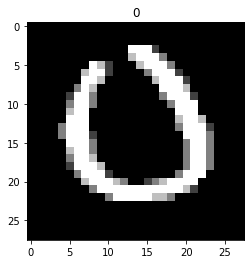

In [8]:
i = 10010
img_1 = (X.values[i, :]).reshape(28, 28)
print(y[i])  # 0

# resmi göster
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [9]:
y[100]

'5'

In [10]:
y.shape

(70000,)

In [11]:
digits = 10
examples = y.shape[0]

y = y.values.reshape(examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [12]:
Y_new.shape

(10, 70000)

In [13]:
Y_new[:, 100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
y[100]

'5'

In [15]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train.values[:, shuffle_index], Y_train[:, shuffle_index]

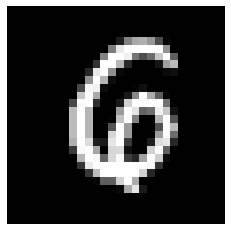

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [17]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [18]:
# sigmoid fonksiyonu
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [19]:
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1. / m) * (np.sum(np.multiply(np.log(Y_hat + epsilon), Y)) + np.sum(
        np.multiply(np.log(1 - Y_hat + epsilon), (1 - Y))))

    return L

In [12]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(1000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  7.812406659279563
Epoch 100 cost:  0.8618089661277170
Epoch 200 cost:  0.4718462859947121
Epoch 300 cost:  0.4508245812073546
Epoch 400 cost:  0.41192074787848879
Epoch 500 cost:  0.397873451506871
Epoch 600 cost:  0.37206822419211924
Epoch 700 cost:  0.3615293030207498
Epoch 800 cost:  0.3345945171238141
Epoch 900 cost:  0.32028736353510096
Final cost: 0.3180782666961474


In [37]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 935    1   10    6    2   13   12    4    7    9]
 [   0 1100   14    3    5    2    3   11   12    5]
 [   4    3  889   26    6   11   13   23    8    2]
 [   8    6   15  883    0   48    0    9   34   10]
 [   3    1   13    3  901    7   17   10   13   46]
 [  16    2   10   34    1  744   18    0   32   16]
 [   6    4   10    2   15   19  873    1   13    3]
 [   1    4   21   10    7    6    2  922    6   29]
 [   5   14   33   28    9   37    6    7  824   11]
 [   1    0    7   15   35    5    2   41   26  796]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.97      0.95      0.96      1155
           2       0.87      0.90      0.89       995
           3       0.87      0.87      0.87      1013
           4       0.92      0.89      0.90      1015
           5       0.83      0.85      0.84       873
           6       0.92      0.92      0.92       958
           7       0.90      0.91   